In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
tf.reset_default_graph()

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2

display(f)

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [3]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
print(sess.run(f))
sess.close()

42


In [4]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

result

42

In [5]:
init = tf.global_variables_initializer()

with tf.Session():
    init.run()
    result = f.eval()

result

42

In [6]:
init = tf.global_variables_initializer()

sess = tf.InteractiveSession()
init.run()
result = f.eval()
sess.close()

result

42

# Managing graphs

In [7]:
tf.reset_default_graph()

x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [8]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)

x2.graph is tf.get_default_graph()

False

In [9]:
x2.graph is graph

True

In [10]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    print(y.eval())  # 10
    print(z.eval())  # 15

10
15


In [11]:
with tf.Session() as sess:
    y_val, z_val = sess.run([y, z])
    print(y_val)  # 10
    print(z_val)  # 15

10
15


# Linear Regression with TensorFlow

In [12]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

In [13]:
tf.reset_default_graph()
#display(housing.target.shape)
X = tf.constant(housing_data_plus_bias, dtype=tf.float64, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float64, name="y")
#display(y.shape)
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

with tf.Session() as sess:
    result = theta.eval()

print(result)

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


# Perceptron

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

In [15]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

/home/johan/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([1])

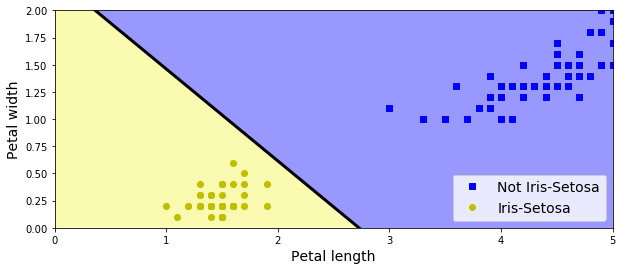

In [16]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

#save_fig("perceptron_iris_plot")
plt.show()

# Tf.learn

In [17]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [18]:
import tensorflow as tf

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10,
                                         feature_columns=feature_columns)
dnn_clf.fit(x=X_train, y=y_train, batch_size=50, steps=40000)

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib

INFO:tensorflow:loss = 0.3667278, step = 301 (0.436 sec)
INFO:tensorflow:global_step/sec: 224.325
INFO:tensorflow:loss = 0.25785565, step = 401 (0.447 sec)
INFO:tensorflow:global_step/sec: 239.367
INFO:tensorflow:loss = 0.22869405, step = 501 (0.415 sec)
INFO:tensorflow:global_step/sec: 260.804
INFO:tensorflow:loss = 0.0657825, step = 601 (0.383 sec)
INFO:tensorflow:global_step/sec: 259.591
INFO:tensorflow:loss = 0.14685597, step = 701 (0.385 sec)
INFO:tensorflow:global_step/sec: 262.325
INFO:tensorflow:loss = 0.21903107, step = 801 (0.381 sec)
INFO:tensorflow:global_step/sec: 260.624
INFO:tensorflow:loss = 0.107177794, step = 901 (0.386 sec)
INFO:tensorflow:global_step/sec: 272.635
INFO:tensorflow:loss = 0.20213054, step = 1001 (0.365 sec)
INFO:tensorflow:global_step/sec: 249.158
INFO:tensorflow:loss = 0.20881414, step = 1101 (0.401 sec)
INFO:tensorflow:global_step/sec: 285.482
INFO:tensorflow:loss = 0.14646544, step = 1201 (0.350 sec)
INFO:tensorflow:global_step/sec: 242.512
INFO:ten

INFO:tensorflow:global_step/sec: 294.869
INFO:tensorflow:loss = 0.00995066, step = 8501 (0.348 sec)
INFO:tensorflow:global_step/sec: 287.573
INFO:tensorflow:loss = 0.0025442454, step = 8601 (0.339 sec)
INFO:tensorflow:global_step/sec: 300.055
INFO:tensorflow:loss = 0.0027740882, step = 8701 (0.333 sec)
INFO:tensorflow:global_step/sec: 297.812
INFO:tensorflow:loss = 0.007628777, step = 8801 (0.336 sec)
INFO:tensorflow:global_step/sec: 300.622
INFO:tensorflow:loss = 0.0028671282, step = 8901 (0.332 sec)
INFO:tensorflow:global_step/sec: 297.293
INFO:tensorflow:loss = 0.013419476, step = 9001 (0.337 sec)
INFO:tensorflow:global_step/sec: 297.233
INFO:tensorflow:loss = 0.008937519, step = 9101 (0.336 sec)
INFO:tensorflow:global_step/sec: 299.867
INFO:tensorflow:loss = 0.013024259, step = 9201 (0.333 sec)
INFO:tensorflow:global_step/sec: 298.376
INFO:tensorflow:loss = 0.008846345, step = 9301 (0.335 sec)
INFO:tensorflow:global_step/sec: 294.001
INFO:tensorflow:loss = 0.045122467, step = 9401 

INFO:tensorflow:loss = 0.0032252008, step = 16501 (0.348 sec)
INFO:tensorflow:global_step/sec: 297.411
INFO:tensorflow:loss = 0.003295678, step = 16601 (0.336 sec)
INFO:tensorflow:global_step/sec: 297.938
INFO:tensorflow:loss = 0.0030975104, step = 16701 (0.336 sec)
INFO:tensorflow:global_step/sec: 293.55
INFO:tensorflow:loss = 0.0029684352, step = 16801 (0.342 sec)
INFO:tensorflow:global_step/sec: 300.366
INFO:tensorflow:loss = 0.004122785, step = 16901 (0.332 sec)
INFO:tensorflow:global_step/sec: 299.239
INFO:tensorflow:loss = 0.004148459, step = 17001 (0.334 sec)
INFO:tensorflow:global_step/sec: 298.367
INFO:tensorflow:loss = 0.0012772239, step = 17101 (0.335 sec)
INFO:tensorflow:global_step/sec: 301.322
INFO:tensorflow:loss = 0.0062162075, step = 17201 (0.332 sec)
INFO:tensorflow:global_step/sec: 299.713
INFO:tensorflow:loss = 0.0016249834, step = 17301 (0.335 sec)
INFO:tensorflow:global_step/sec: 287.321
INFO:tensorflow:loss = 0.0011312801, step = 17401 (0.346 sec)
INFO:tensorflow

INFO:tensorflow:global_step/sec: 296.109
INFO:tensorflow:loss = 0.0009263355, step = 24501 (0.338 sec)
INFO:tensorflow:global_step/sec: 299.529
INFO:tensorflow:loss = 0.0004665117, step = 24601 (0.334 sec)
INFO:tensorflow:global_step/sec: 299.315
INFO:tensorflow:loss = 0.0010223058, step = 24701 (0.336 sec)
INFO:tensorflow:global_step/sec: 296.274
INFO:tensorflow:loss = 0.0015965268, step = 24801 (0.336 sec)
INFO:tensorflow:global_step/sec: 300.512
INFO:tensorflow:loss = 0.0014037909, step = 24901 (0.332 sec)
INFO:tensorflow:global_step/sec: 277.142
INFO:tensorflow:loss = 0.00038465814, step = 25001 (0.361 sec)
INFO:tensorflow:global_step/sec: 245.375
INFO:tensorflow:loss = 0.00148876, step = 25101 (0.408 sec)
INFO:tensorflow:global_step/sec: 246.795
INFO:tensorflow:loss = 0.001706969, step = 25201 (0.405 sec)
INFO:tensorflow:global_step/sec: 246.796
INFO:tensorflow:loss = 0.0002088668, step = 25301 (0.405 sec)
INFO:tensorflow:global_step/sec: 270.366
INFO:tensorflow:loss = 0.000692305

INFO:tensorflow:global_step/sec: 258.595
INFO:tensorflow:loss = 0.00040557486, step = 32501 (0.388 sec)
INFO:tensorflow:global_step/sec: 266.059
INFO:tensorflow:loss = 0.0001366075, step = 32601 (0.374 sec)
INFO:tensorflow:global_step/sec: 289.262
INFO:tensorflow:loss = 0.0010750627, step = 32701 (0.346 sec)
INFO:tensorflow:global_step/sec: 279.848
INFO:tensorflow:loss = 0.0009075151, step = 32801 (0.358 sec)
INFO:tensorflow:global_step/sec: 275.755
INFO:tensorflow:loss = 0.000757748, step = 32901 (0.362 sec)
INFO:tensorflow:global_step/sec: 283.92
INFO:tensorflow:loss = 0.00060016656, step = 33001 (0.352 sec)
INFO:tensorflow:global_step/sec: 209.393
INFO:tensorflow:loss = 0.0024116903, step = 33101 (0.479 sec)
INFO:tensorflow:global_step/sec: 158.89
INFO:tensorflow:loss = 0.0008336779, step = 33201 (0.629 sec)
INFO:tensorflow:global_step/sec: 178.672
INFO:tensorflow:loss = 0.0001552428, step = 33301 (0.562 sec)
INFO:tensorflow:global_step/sec: 257.752
INFO:tensorflow:loss = 0.00098497

DNNClassifier(params={'activation_fn': <function relu at 0x7f5af1ec3ae8>, 'hidden_units': [300, 100], 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None),), 'dropout': None, 'embedding_lr_multipliers': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f5a9d667a58>, 'optimizer': None, 'gradient_clip_norm': None, 'input_layer_min_slice_size': None})

In [19]:
#plt.imshow(X_train[0])
display(X_train.shape)
display(feature_columns[0][0])

(55000, 784)

''

In [20]:
# RUnning on the test set:
from sklearn.metrics import accuracy_score
y_pred = list(dnn_clf.predict(X_test))
accuracy = accuracy_score(y_test, y_pred)
accuracy

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpkewqz6hn/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9835

# Training a DNN (Plain TensorFlow)

In [23]:
import tensorflow as tf

def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        #f.nn.sparse_softmax_cross_entropy_with_log
        stddev = 1 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        Z = tf.matmul(X, W) + b
        if activation=="relu":
            return tf.nn.relu(Z)
        else:
            return Z

In [24]:
tf.reset_default_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, "hidden1", activation="relu")
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation="relu")
    logits = neuron_layer(hidden2, n_outputs, "output")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [25]:
n_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            #display(X_batch)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        #print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

In [29]:
n_epochs = 20
batch_size = 50
#Dtraining = tf.data.Dataset.from_tensor_slices((X_train,y_train))
#Dtraining = Dtraining.batch(batch_size)
#iterator = dataset.make_initializable_iterator()


dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# Generate the complete Dataset required in the pipeline
dataset = dataset.repeat(n_epochs ).batch(batch_size)
iterator = dataset.make_one_shot_iterator()

X,y = iterator.get_next()

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        #sess.run(iterator.initializer)
        sess.run(tf.global_variables_initializer())
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = sess.run(X,y)
            #X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
            print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

TypeError: Using a `tf.Tensor` as a Python `bool` is not allowed. Use `if t is not None:` instead of `if t:` to test if a tensor is defined, and use TensorFlow ops such as tf.cond to execute subgraphs conditioned on the value of a tensor.

In [0]:
with tf.Session() as sess:
    saver.restore(sess, save_path) #"my_model_final.ckpt")
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    print(np.argmax(Z, axis=1))
    print(mnist.test.labels[:20])